In [699]:
# Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

# Import the excel file containing our Economic Freedom Scores dataset
ten_year_source = os.path.join('EF_Data_Sets', '2008-2019_combined.xls')
ten_year_df = pd.read_excel(ten_year_source)

ten_year_df.head()

,name,index year,overall score,property rights,government integrity,judicial effectiveness,tax burden,government spending,fiscal health,business freedom,labor freedom,monetary freedom,trade freedom,investment freedom,financial freedom
0,Afghanistan,2019,51.5,19.6,25.2,29.6,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0
1,Albania,2019,66.5,54.8,40.4,30.6,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0
2,Algeria,2019,46.2,31.6,28.9,36.2,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0
3,Angola,2019,50.6,35.9,20.5,26.6,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0
4,Argentina,2019,52.2,47.8,33.5,44.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0


In [700]:
current_year_source = os.path.join('EF_Data_Sets', 'index2019_data.xls')

# Import the 2019 Economic Freedom Scores dataset from excel and only pull the "name" and "region" columns
# The "region" column is only in the current year's Economic Freedom Scores dataset so we need to be able to add it to
# our multi-year DataFrame
region_col = [1, 3]
region_df = pd.read_excel(current_year_source, usecols = region_col)
region_df.rename(columns = {"Country Name": "name", "Region": "region"}, inplace = True)

region_df.head()

,name,region
0,Afghanistan,Asia-Pacific
1,Albania,Europe
2,Algeria,Middle East and North Africa
3,Angola,Sub-Saharan Africa
4,Argentina,Americas


In [701]:
# Merge our two DataFrames based on the country "name"; allows us to get the "region" column
primary_df = pd.merge(ten_year_df, region_df, on="name", how = "left")
primary_df.head()

,name,index year,overall score,property rights,government integrity,judicial effectiveness,tax burden,government spending,fiscal health,business freedom,labor freedom,monetary freedom,trade freedom,investment freedom,financial freedom,region
0,Afghanistan,2019,51.5,19.6,25.2,29.6,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,Asia-Pacific
1,Albania,2019,66.5,54.8,40.4,30.6,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0,Europe
2,Algeria,2019,46.2,31.6,28.9,36.2,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,Middle East and North Africa
3,Angola,2019,50.6,35.9,20.5,26.6,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0,Sub-Saharan Africa
4,Argentina,2019,52.2,47.8,33.5,44.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,Americas


In [702]:
# Sorted the DataFrame first by "index year" and second by "name"
index_year_df = primary_df.sort_values(by=["index year", "name"], ascending=True)
index_year_df

,name,index year,overall score,property rights,government integrity,judicial effectiveness,tax burden,government spending,fiscal health,business freedom,labor freedom,monetary freedom,trade freedom,investment freedom,financial freedom,region
2036,Afghanistan,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia-Pacific
2037,Albania,2008,62.4,30.0,26.0,NaN,90.3,76.0,NaN,55.6,49.5,80.4,75.8,70.0,70.0,Europe
2038,Algeria,2008,56.2,30.0,31.0,NaN,77.0,74.6,NaN,73.6,57.0,80.2,68.8,40.0,30.0,Middle East and North Africa
2039,Angola,2008,46.9,20.0,22.0,NaN,85.2,72.8,NaN,36.7,41.5,57.8,73.0,20.0,40.0,Sub-Saharan Africa
2040,Argentina,2008,54.2,30.0,29.0,NaN,70.5,80.9,NaN,63.7,42.9,65.0,69.6,50.0,40.0,Americas
2041,Armenia,2008,69.9,35.0,29.0,NaN,89.0,86.4,NaN,81.3,68.2,84.6,85.0,70.0,70.0,Europe
2042,Australia,2008,82.2,90.0,87.0,NaN,59.2,62.8,NaN,90.3,95.5,83.7,83.8,80.0,90.0,Asia-Pacific
2043,Austria,2008,71.4,90.0,86.0,NaN,51.2,25.3,NaN,80.9,73.2,81.4,86.0,70.0,70.0,Europe
2044,Azerbaijan,2008,55.3,30.0,24.0,NaN,80.4,82.9,NaN,62.6,58.7,76.5,78.4,30.0,30.0,Asia-Pacific
2045,Bahrain,2008,72.2,60.0,57.0,NaN,99.7,80.3,NaN,80.0,40.0,74.3,80.8,60.0,90.0,Middle East and North Africa


In [703]:
# Find average overall world score for 2009
scores_2010 = index_year_df[index_year_df["index year"] == 2010.0]
average_2010 = scores_2010["overall score"].mean()
average_2010

59.365363128491595

In [704]:
# Find average overall world score for 2019
scores_2019 = index_year_df[index_year_df["index year"] == 2019.0]
average_2019 = scores_2019["overall score"].mean()
average_2019

60.76833333333333

In [705]:
# Find average score for the 10 factors for 2010
property_rights_2010 = scores_2010["property rights"].mean()
property_2010 = round(property_rights_2010, 1)

govt_integrity_2010 = scores_2010["government integrity"].mean()
govt_2010 = round(govt_integrity_2010, 1)

tax_burden_2010 = scores_2010["tax burden"].mean()
tax_2010 = round(tax_burden_2010, 1)

govt_spend_2010 = scores_2010["government spending"].mean()
spend_2010 = round(govt_spend_2010, 1)

business_freedom_2010 = scores_2010["business freedom"].mean()
business_2010 = round(business_freedom_2010, 1)

labor_freedom_2010 = scores_2010["labor freedom"].mean()
labor_2010 = round(labor_freedom_2010, 1)

monetary_freedom_2010 = scores_2010["monetary freedom"].mean()
monetary_2010 = round(monetary_freedom_2010, 1)

trade_freedom_2010 = scores_2010["trade freedom"].mean()
trade_2010 = round(trade_freedom_2010, 1)

invest_freedom_2010 = scores_2010["investment freedom"].mean()
invest_2010 = round(invest_freedom_2010, 1)

financial_freedom_2010 = scores_2010["financial freedom"].mean()
financial_2010 = round(financial_freedom_2010, 1)

In [706]:
# Combine the average scores into a list to easily plot the values
averages_2010 = [property_2010, govt_2010, tax_2010, spend_2010, business_2010, labor_2010, monetary_2010,
                 trade_2010, invest_2010, financial_2010]
averages_2010

[43.8, 40.5, 75.4, 65.0, 64.6, 62.1, 70.6, 74.2, 49.0, 48.5]

In [707]:
# Find average score for the 10 factors for 2019
property_rights_2019 = scores_2019["property rights"].mean()
property_2019 = round(property_rights_2019, 1)

govt_integrity_2019 = scores_2019["government integrity"].mean()
govt_2019 = round(govt_integrity_2019, 1)

tax_burden_2019 = scores_2019["tax burden"].mean()
tax_2019 = round(tax_burden_2019, 1)

govt_spend_2019 = scores_2019["government spending"].mean()
spend_2019 = round(govt_spend_2019, 1)

business_freedom_2019 = scores_2019["business freedom"].mean()
business_2019 = round(business_freedom_2019, 1)

labor_freedom_2019 = scores_2019["labor freedom"].mean()
labor_2019 = round(labor_freedom_2019, 1)

monetary_freedom_2019 = scores_2019["monetary freedom"].mean()
monetary_2019 = round(monetary_freedom_2019, 1)

trade_freedom_2019 = scores_2019["trade freedom"].mean()
trade_2019 = round(trade_freedom_2019, 1)

invest_freedom_2019 = scores_2019["investment freedom"].mean()
invest_2019 = round(invest_freedom_2019, 1)

financial_freedom_2019 = scores_2019["financial freedom"].mean()
financial_2019 = round(financial_freedom_2019, 1)

In [708]:
# Combine the average scores into a list to easily plot the values
averages_2019 = [property_2019, govt_2019, tax_2019, spend_2019, business_2019, labor_2019, monetary_2019,
                 trade_2019, invest_2019, financial_2019]
averages_2019

[52.3, 41.5, 77.2, 64.2, 63.5, 59.4, 75.1, 74.3, 57.3, 48.8]

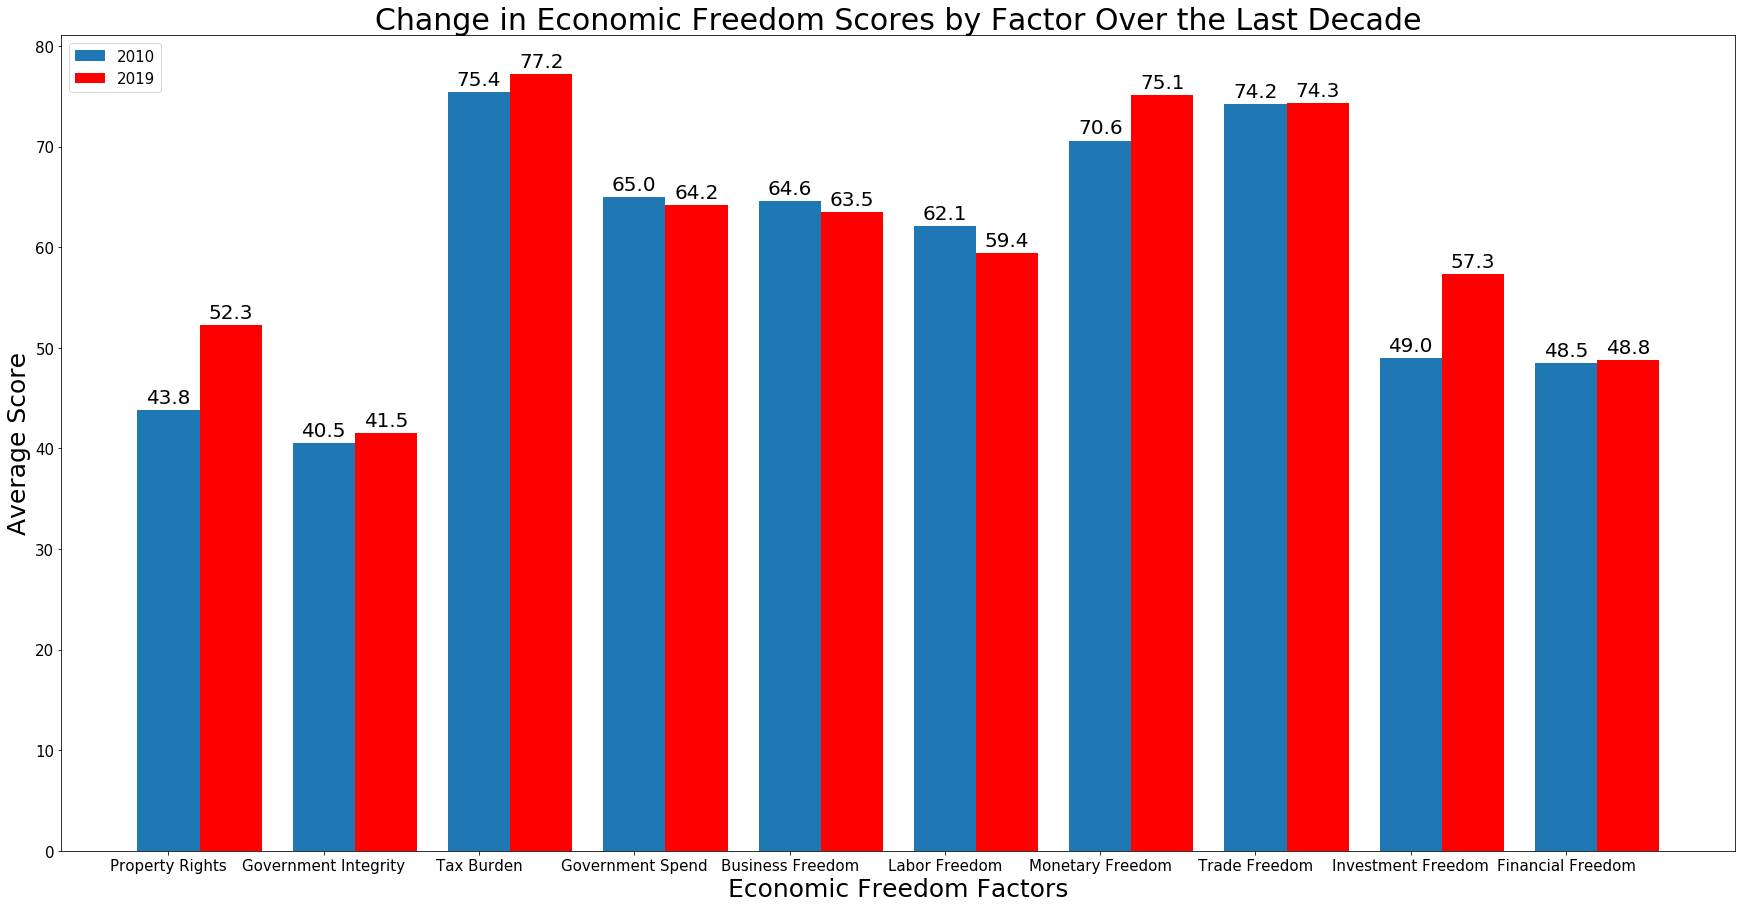

In [857]:
# Get 10 numbers to hold the place for the 10 economic factors and create a list to hold the legend labels
x = np.arange(10)
labels = ["2010", "2019"]

# Plot the multiple bar chart with 2010 and 2019 freedom factor values 
plt.figure(figsize=(30, 15))
scores_2010 = plt.bar(x, averages_2010, width=.4)
scores_2019 = plt.bar(x + .4, averages_2019, width=.4, color="r")

# Title the chart, label the axes, and adjust the fonts
plt.title("Change in Economic Freedom Scores by Factor Over the Last Decade", fontsize=30)
plt.ylabel("Average Score", fontsize=25)
plt.xlabel("Economic Freedom Factors", fontsize=25)

# Adjust the font size of the ticks and change the xticks from numeric to the appropriate freedom factors
plt.yticks(fontsize=15)
plt.xticks(np.arange(10), ("Property Rights", "Government Integrity", "Tax Burden", "Government Spend", 
                         "Business Freedom", "Labor Freedom", "Monetary Freedom", "Trade Freedom", 
                         "Investment Freedom", "Financial Freedom"), fontsize=15)

# Place the legend in the upper left
plt.legend(labels, loc="upper left", fontsize=15)

# Defined a function to calculate the heights of each bar and display the numeric height at the top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=20)
autolabel(scores_2010)
autolabel(scores_2019)

# Save the figure


In [818]:
# Import the 2010 and 2019 combined dataset
data_2010_2019 = os.path.join('EF_Data_Sets', '2010_2019_overall_scores.xls')

df_2010_2019 = pd.read_excel(data_2010_2019)

# Set the index to the "name" of the countries
df_2010_2019 = df_2010_2019.set_index(["name"])
df_2010_2019.head()

,index year,overall score,2010 score
name,,,
Afghanistan,2019,51.5,NaN
Albania,2019,66.5,66.0
Algeria,2019,46.2,56.9
Angola,2019,50.6,48.4
Argentina,2019,52.2,51.2


In [819]:
# Calculate the change in score for each country from 2010 to 2019
decade_change = df_2010_2019["overall score"] - df_2010_2019["2010 score"]
decade_change.head()

name
Afghanistan     NaN
Albania         0.5
Algeria       -10.7
Angola          2.2
Argentina       1.0
dtype: float64

In [820]:
# Sort the DataFrame by ascending values to see the 10 countries with the largest decrease in overall score
decade_change = pd.DataFrame(decade_change)
decade_change.sort_values([0], ascending=True).head(10)

,0
name,
Venezuela,-11.2
Algeria,-10.7
Bahrain,-9.9
Trinidad and Tobago,-8.7
Lebanon,-8.4
El Salvador,-8.1
Equatorial Guinea,-7.6
Mozambique,-7.4
Bolivia,-7.1


In [822]:
# Drop the rows containing data for the years 2008 and 2009
index_year_df = index_year_df.rename(columns={"index year": "index_year", "overall score": "overall_score"})
index_year_df = index_year_df[index_year_df.index_year != 2008.0]
index_year_df = index_year_df[index_year_df.index_year != 2009.0]

# Separate each of the bottom 10 countries into their own DataFrame
decade_df = index_year_df[["index_year", "name", "overall_score"]]
venezuela_df = decade_df[decade_df["name"] == "Venezuela "]
algeria_df = decade_df[decade_df["name"] == "Algeria"] 
bahrain_df = decade_df[decade_df["name"] == "Bahrain"]
trinidad_df = decade_df[decade_df["name"] == "Trinidad and Tobago"]
lebanon_df = decade_df[decade_df["name"] == "Lebanon"]
salvador_df = decade_df[decade_df["name"] == "El Salvador "]
eguinea_df = decade_df[decade_df["name"] == "Equatorial Guinea"]
mozambique_df = decade_df[decade_df["name"] == "Mozambique "]
bolivia_df = decade_df[decade_df["name"] == "Bolivia"]
kuwait_df = decade_df[decade_df["name"] == "Kuwait"]

In [823]:
# Merge all 10 DataFrames into one
bottom10_df = pd.merge(venezuela_df, algeria_df, how="outer")
bottom10_df = pd.merge(bottom10_df, bahrain_df, how="outer")
bottom10_df = pd.merge(bottom10_df, trinidad_df, how="outer")
bottom10_df = pd.merge(bottom10_df, lebanon_df, how="outer")
bottom10_df = pd.merge(bottom10_df, salvador_df, how="outer")
bottom10_df = pd.merge(bottom10_df, eguinea_df, how="outer")
bottom10_df = pd.merge(bottom10_df, mozambique_df, how="outer")
bottom10_df = pd.merge(bottom10_df, bolivia_df, how="outer")
bottom10_df = pd.merge(bottom10_df, kuwait_df, how="outer")

# Rename the columns so they have no spaces
bottom10_df = bottom10_df.rename(columns={"index year": "index_year", "overall score": "overall_score"})
bottom10_df.head()

,index_year,name,overall_score
0,2010,Venezuela,37.1
1,2011,Venezuela,37.6
2,2012,Venezuela,38.1
3,2013,Venezuela,36.1
4,2014,Venezuela,36.3


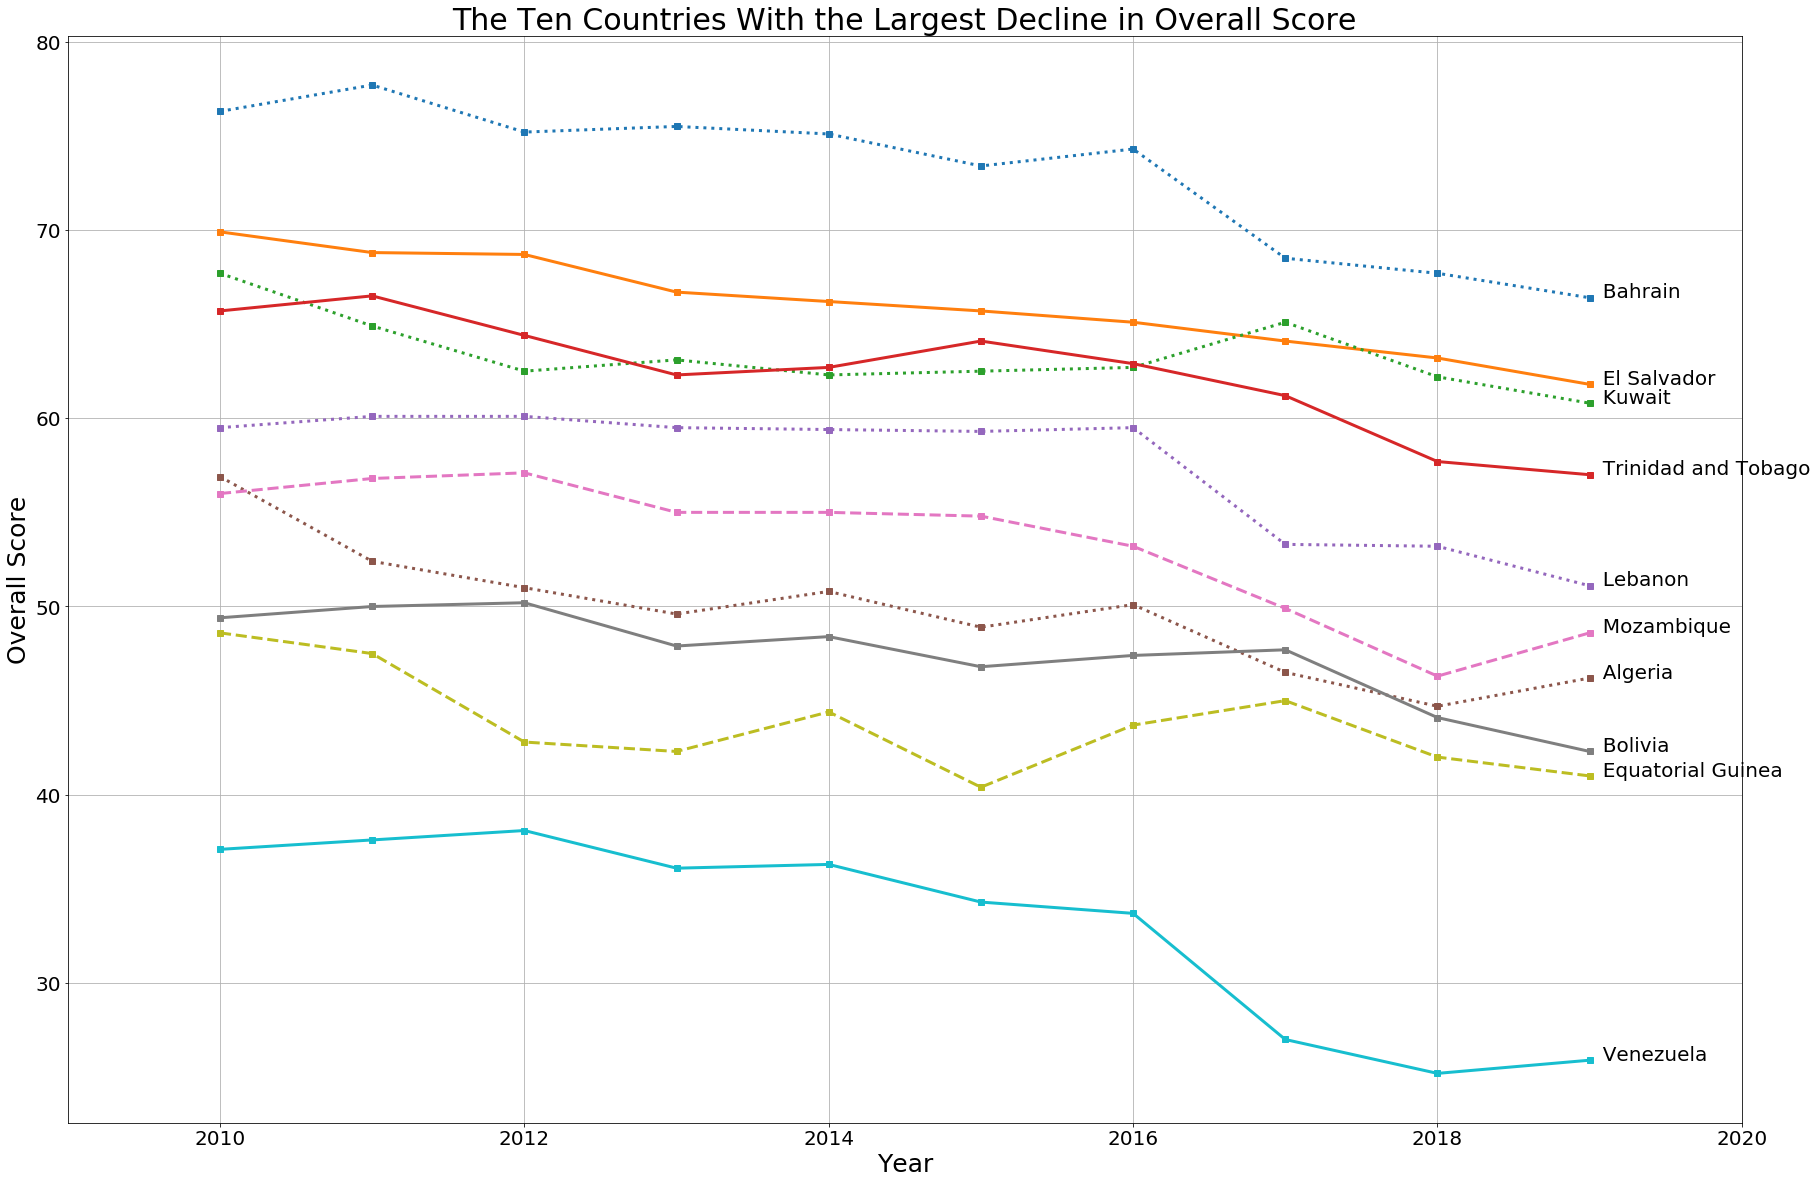

In [873]:
# Create a list to hold the countries
countries = ["Bahrain", "El Salvador", "Kuwait", "Trinidad and Tobago", "Lebanon", "Algeria", "Mozambique", 
             "Bolivia", "Equatorial Guinea", "Venezuela"]

# Plot the 10 year data for each country on a separate line in the chart
# Solid linestyle is Americas region
# Dotted linestyle is North Africa/Middle East region
# Dashed linestyle is Sub-Saharan Africa region
plt.figure(figsize=(30,20))
plt.plot(bahrain_df["index_year"], bahrain_df["overall_score"], linewidth=3, marker="s", linestyle=":")
plt.plot(salvador_df["index_year"], salvador_df["overall_score"], linewidth=3, marker="s")
plt.plot(kuwait_df["index_year"], kuwait_df["overall_score"], linewidth=3, marker="s", linestyle=":")
plt.plot(trinidad_df["index_year"], trinidad_df["overall_score"], linewidth=3, marker="s")
plt.plot(lebanon_df["index_year"], lebanon_df["overall_score"], linewidth=3, marker="s", linestyle=":")
plt.plot(algeria_df["index_year"], algeria_df["overall_score"], linewidth=3, marker="s", linestyle=":")
plt.plot(mozambique_df["index_year"], mozambique_df["overall_score"], linewidth=3, marker="s", linestyle="--")
plt.plot(bolivia_df["index_year"], bolivia_df["overall_score"], linewidth=3, marker="s")
plt.plot(eguinea_df["index_year"], eguinea_df["overall_score"],linewidth=3, marker="s", linestyle="--")
plt.plot(venezuela_df["index_year"], venezuela_df["overall_score"], linewidth=3, marker="s")

# Place a black text label at the end of each plotted line rather than use a legend
plt.text(2019, bahrain_df.overall_score.tail(1), "  Bahrain", horizontalalignment="left", fontsize=20, color="k")
plt.text(2019, salvador_df.overall_score.tail(1), "  El Salvador", horizontalalignment="left", fontsize=20, color="k")
plt.text(2019, kuwait_df.overall_score.tail(1), "  Kuwait", horizontalalignment="left", fontsize=20, color="k")
plt.text(2019, trinidad_df.overall_score.tail(1), "  Trinidad and Tobago", horizontalalignment="left", fontsize=20, color="k")
plt.text(2019, lebanon_df.overall_score.tail(1), "  Lebanon", horizontalalignment="left", fontsize=20, color="k")
plt.text(2019, algeria_df.overall_score.tail(1), "  Algeria", horizontalalignment="left", fontsize=20, color="k")
plt.text(2019, mozambique_df.overall_score.tail(1), "  Mozambique", horizontalalignment="left", fontsize=20, color="k")
plt.text(2019, bolivia_df.overall_score.tail(1), "  Bolivia", horizontalalignment="left", fontsize=20, color="k")
plt.text(2019, eguinea_df.overall_score.tail(1), "  Equatorial Guinea", horizontalalignment="left", fontsize=20, color="k")
plt.text(2019, venezuela_df.overall_score.tail(1), "  Venezuela", horizontalalignment="left", fontsize=20, color="k")

# Title the chart, label the axes, add a legend, add gridlines, and adjust the font sizes
plt.title("The Ten Countries With the Largest Decline in Overall Score", fontsize=30)
plt.ylabel("Overall Score", fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.xlim(2009, 2020)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
